# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2264a94ac9a628d0057660fd7802ef96
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-francois
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | smithers
Processing Record 4 of Set 1 | nouadhibou
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | ola
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | baukau
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | mugia
Processing Record 15 of Set 1 | kapuskasing
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | santa ana
Processing Record 18 of Set 1 | daru
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | polyarnyy
Processing Record

Processing Record 42 of Set 4 | al bardiyah
Processing Record 43 of Set 4 | baley
Processing Record 44 of Set 4 | ushuaia
Processing Record 45 of Set 4 | lepsy
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | fort wellington
Processing Record 49 of Set 4 | marksville
Processing Record 0 of Set 5 | kulp
Processing Record 1 of Set 5 | rikaze
Processing Record 2 of Set 5 | monrovia
Processing Record 3 of Set 5 | gaspe
Processing Record 4 of Set 5 | ust-nera
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | isle of lewis
City not found. Skipping...
Processing Record 7 of Set 5 | malvan
Processing Record 8 of Set 5 | bryne
Processing Record 9 of Set 5 | laboulaye
Processing Record 10 of Set 5 | bisingen
Processing Record 11 of Set 5 | candelaria
Processing Record 12 of Set 5 | agramunt
Processing Record 13 of Set 5 | manicore
Processing Record 14 of Set 5 | lae
Processing Record 15 of Set 5 | 

City not found. Skipping...
Processing Record 33 of Set 8 | karabash
Processing Record 34 of Set 8 | milagro
Processing Record 35 of Set 8 | chyhyryn
Processing Record 36 of Set 8 | santa elena de uairen
Processing Record 37 of Set 8 | ouellah
City not found. Skipping...
Processing Record 38 of Set 8 | soe
Processing Record 39 of Set 8 | ghormach
Processing Record 40 of Set 8 | petropavlovsk-kamchatsky
Processing Record 41 of Set 8 | lensk
Processing Record 42 of Set 8 | pangkalpinang
Processing Record 43 of Set 8 | constantia
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 46 of Set 8 | tangalle
Processing Record 47 of Set 8 | talnakh
Processing Record 48 of Set 8 | rongelap
Processing Record 49 of Set 8 | yanqul
Processing Record 0 of Set 9 | arawa
Processing Record 1 of Set 9 | touros
Processing Record 2 of Set 9 | paramonga
Processing Record 3 of Set 9 | shingu
Processing Record 4 of Set 9 | ust'-kul

Processing Record 21 of Set 12 | pangoa
Processing Record 22 of Set 12 | xilin hot
Processing Record 23 of Set 12 | kasulu
Processing Record 24 of Set 12 | ain sukhna
Processing Record 25 of Set 12 | hilongos
Processing Record 26 of Set 12 | rensselaer
Processing Record 27 of Set 12 | homer
Processing Record 28 of Set 12 | greenland
Processing Record 29 of Set 12 | yoloten
Processing Record 30 of Set 12 | hell-ville
Processing Record 31 of Set 12 | floro
Processing Record 32 of Set 12 | quepos
Processing Record 33 of Set 12 | nova sintra
Processing Record 34 of Set 12 | al kharijah
Processing Record 35 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 36 of Set 12 | myrina
Processing Record 37 of Set 12 | thaton
Processing Record 38 of Set 12 | tropea
Processing Record 39 of Set 12 | chonchi
Processing Record 40 of Set 12 | karungdong
Processing Record 41 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 42 of Set 12 | hilton head island
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-francois,46.4154,3.9054,20.69,83,0,2.06,FR,1690616132
1,grytviken,-54.2811,-36.5092,-2.02,86,100,5.10,GS,1690616133
2,smithers,54.7804,-127.1743,13.18,82,0,1.03,CA,1690615510
3,nouadhibou,20.9310,-17.0347,21.99,78,7,8.23,MR,1690616134
4,college,64.8569,-147.8028,23.99,57,75,3.09,US,1690616134


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-francois,46.4154,3.9054,20.69,83,0,2.06,FR,1690616132
1,grytviken,-54.2811,-36.5092,-2.02,86,100,5.10,GS,1690616133
2,smithers,54.7804,-127.1743,13.18,82,0,1.03,CA,1690615510
3,nouadhibou,20.9310,-17.0347,21.99,78,7,8.23,MR,1690616134
4,college,64.8569,-147.8028,23.99,57,75,3.09,US,1690616134


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

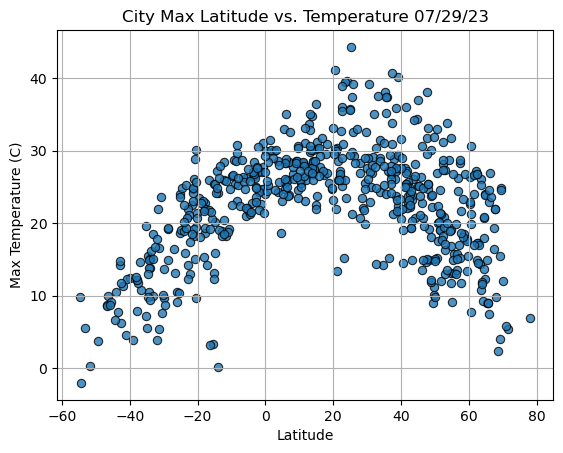

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=0.8,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

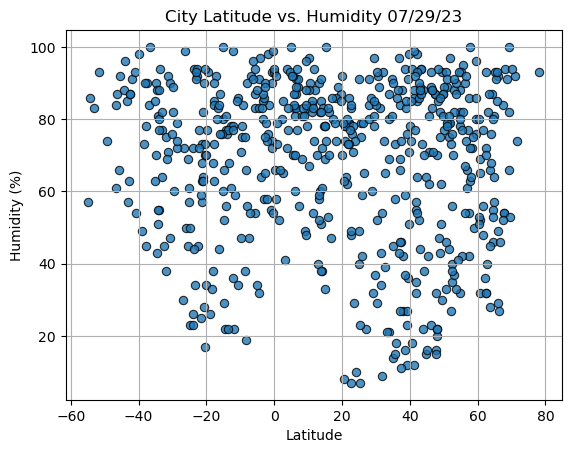

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=0.8,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

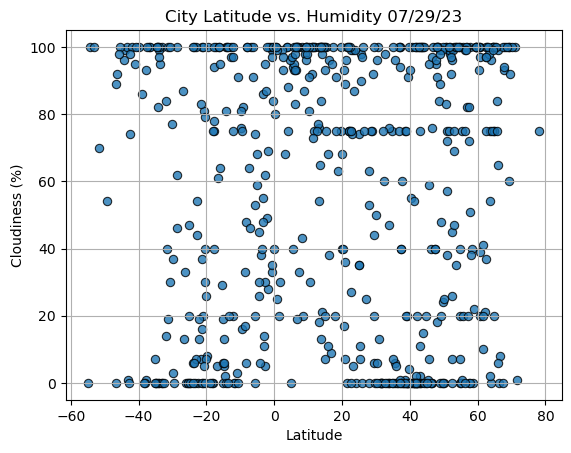

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=0.8,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

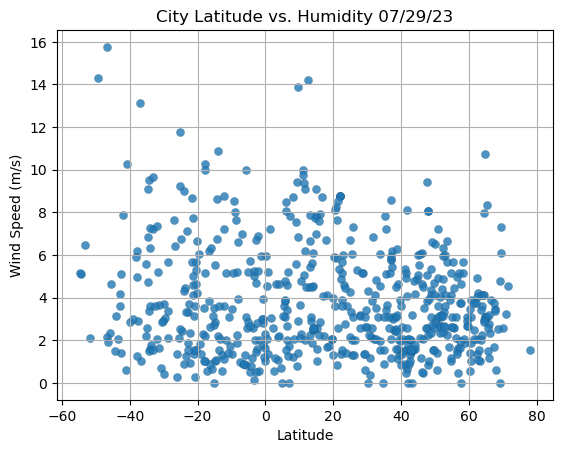

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=.08, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, y_label, annotate_pos):
    
    # Perform linear regression
    (slope, intercept, r, p, stderr) = linregress(x, y)
    regression = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Scatterplot and regression line
    plt.scatter(x, y)
    plt.plot(x, regression, "r")

    # Annotate text
    plt.annotate(line_eq, annotate_pos, fontsize=12, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

    print(f"R value is {r}")
    print(f"P value is {p}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-francois,46.4154,3.9054,20.69,83,0,2.06,FR,1690616132
2,smithers,54.7804,-127.1743,13.18,82,0,1.03,CA,1690615510
3,nouadhibou,20.9310,-17.0347,21.99,78,7,8.23,MR,1690616134
4,college,64.8569,-147.8028,23.99,57,75,3.09,US,1690616134
5,ola,59.5833,151.2833,17.86,76,100,3.10,RU,1690616134


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-2.02,86,100,5.10,GS,1690616133
6,puerto ayora,-0.7393,-90.3518,24.75,93,33,1.79,EC,1690616135
9,fale old settlement,-9.3852,-171.2468,28.73,75,16,8.51,TK,1690615610
17,daru,-9.0763,143.2092,25.46,84,82,8.01,PG,1690615577
21,mala,-12.6581,-76.6308,18.92,78,100,0.54,PE,1690616141


###  Temperature vs. Latitude Linear Regression Plot

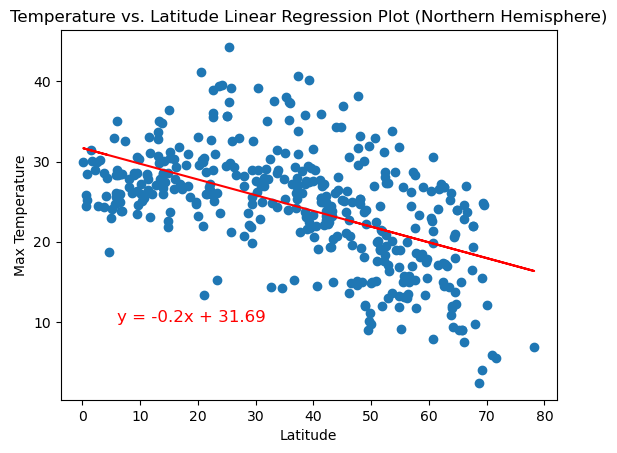

R value is -0.5352953892785957
P value is 9.689743086560406e-31


In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

plot_linear_regression(x, y, 
                       "Temperature vs. Latitude Linear Regression Plot (Northern Hemisphere)",
                       "Max Temperature", (6, 10))

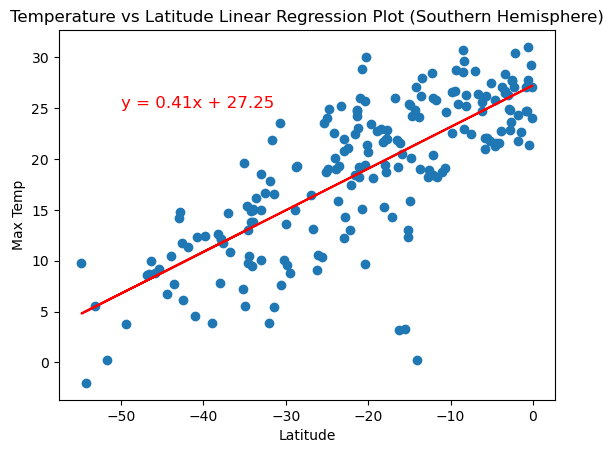

R value is 0.7659322454437971
P value is 2.8934055835170433e-39


In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

plot_linear_regression(x, y, 
                       "Temperature vs Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Max Temp",(-50,25))

**Discussion about the linear relationship:** The linear regression analysis reveals a moderately negative correlation (r = -0.535) between temperature and latitude in the Northern Hemisphere, indicating that temperature tends to decrease as we progress from the equator to higher latitudes. In contrast, a moderately positive correlation (r = 0.766) exists in the Southern Hemisphere, indicating that temperature tends to increase as we progress from higher latitudes toward the equator. The equator receives more direct sunlight, causing higher temperatures, whereas higher latitudes receive more dispersed sunlight, causing lower temperatures. The statistically significant p-values (9.69e-31 for the Northern Hemisphere and 2.89e-39 for the Southern Hemisphere) indicate that these associations are unlikely to be the result of random coincidence. 

### Humidity vs. Latitude Linear Regression Plot

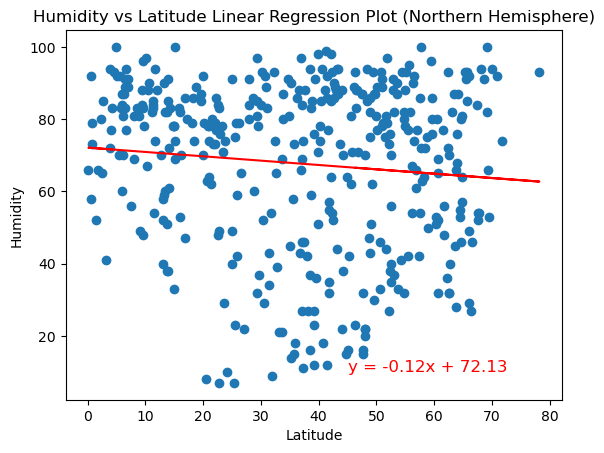

R value is -0.10065622940075304
P value is 0.045307507850940565


In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

plot_linear_regression(x, y, 
                       "Humidity vs Latitude Linear Regression Plot (Northern Hemisphere)",
                       "Humidity",(45,10))

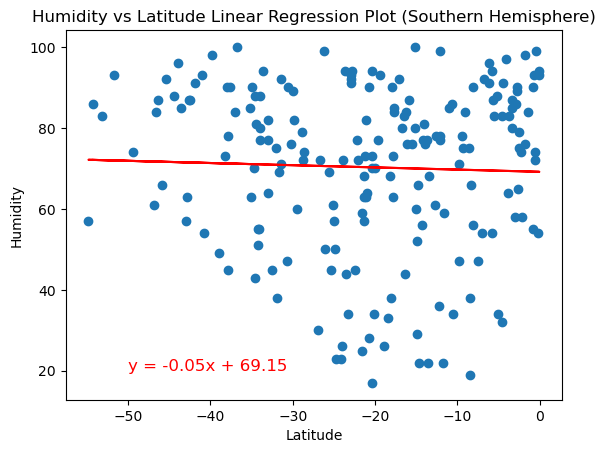

R value is -0.03571064719244413
P value is 0.6183486529820887


In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

plot_linear_regression(x, y, 
                       "Humidity vs Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Humidity",(-50,20))

**Discussion about the linear relationship:** The linear regression analysis reveals feeble and marginally inverse relationships between humidity and latitude in both the Northern and Southern Hemispheres. As we progress away from the equator towards higher latitudes in the Northern Hemisphere, the regression equation y = -0.12x + 72.13 indicates a minor decline in humidity. The r-value of -0.101 shows a very weak correlation, and the statistically significant p-value of 0.0453 indicates that the relationship cannot be attributed to random chance. However, factors other than latitude may substantially impact the humidity variations in this region. In the Southern Hemisphere, the regression equation y = -0.05x + 69.15 indicates a slight decrease in humidity as we progress from higher latitudes toward the equator. The exceedingly weak correlation (r = -0.036) and non-significant p-value (0.618) indicate that latitude is not a significant factor in explaining variations in humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

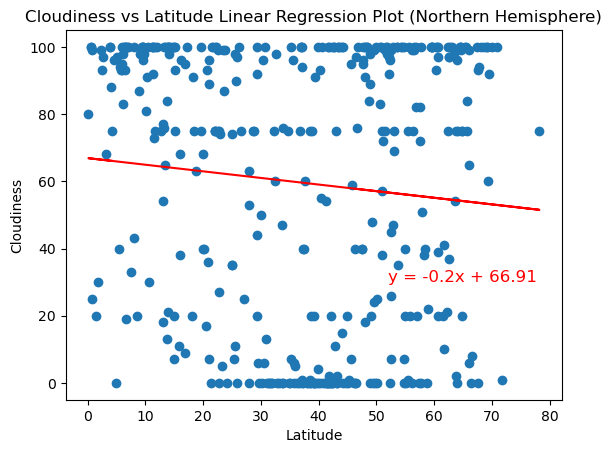

R value is -0.09454164609421362
P value is 0.0601599266788921


In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

plot_linear_regression(x, y, 
                       "Cloudiness vs Latitude Linear Regression Plot (Northern Hemisphere)",
                       "Cloudiness",(52,30))

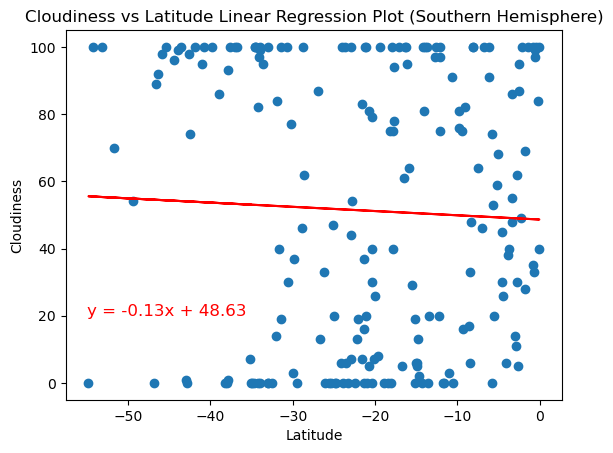

R value is -0.04257735712112922
P value is 0.552466522838178


In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

plot_linear_regression(x, y, 
                       "Cloudiness vs Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Cloudiness",(-55,20))

**Discussion about the linear relationship:** The linear regression analysis reveals feeble and modest inverse relationships between cloudiness and latitude in the Northern and Southern Hemispheres. In the Northern Hemisphere, the regression equation y = -0.2x + 66.91 indicates that cloudiness decreases slightly as we proceed from the equator to higher latitudes. The r-value of -0.095 shows a very weak correlation, and the p-value of 0.0602 indicates that the relationship is marginally significant; however, caution is advised due to the weak correlation. In the Southern Hemisphere, the regression equation y = -0.13x + 48.63 indicates a slight decrease in cloudiness as we progress from higher latitudes toward the equator. The exceedingly weak correlation (r = -0.043) and nonsignificant p-value (0.552) suggest that latitude is not a significant factor in explaining variations in cloudiness in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

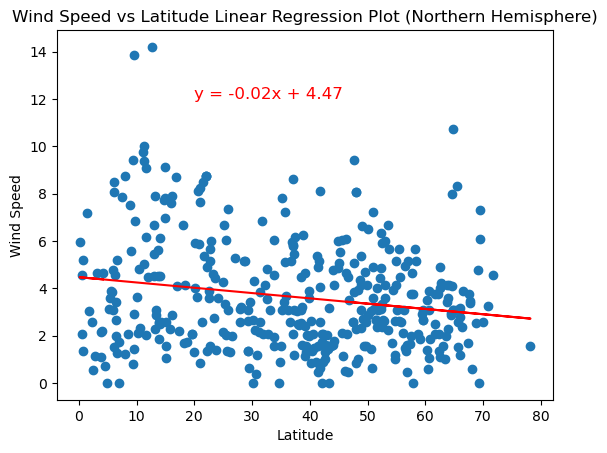

R value is -0.18651343967899833
P value is 0.00018948150789820645


In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

plot_linear_regression(x, y,
                       "Wind Speed vs Latitude Linear Regression Plot (Northern Hemisphere)",
                       "Wind Speed",(20,12))

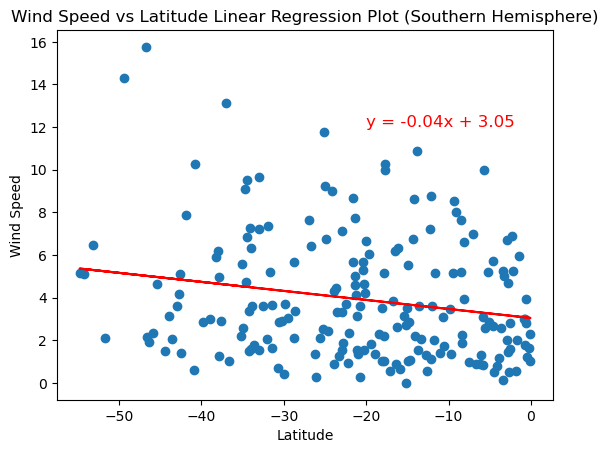

R value is -0.1979035618648652
P value is 0.005309061710519483


In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

plot_linear_regression(x, y, 
                       "Wind Speed vs Latitude Linear Regression Plot (Southern Hemisphere)",
                       "Wind Speed",(-20,12))

**Discussion about the linear relationship:** The linear regression plots show a weak and slightly opposite link between wind speed and latitude in the Northern and Southern Hemispheres. In the Northern Hemisphere, the regression equation y = -0.02x + 4.47 indicates that wind speed decreases slightly as we proceed from the equator to higher latitudes. The r-value of -0.187 shows a very faint negative correlation, and the statistically significant p-value of 0.0002 indicates that the relationship is unlikely to result from random coincidence. Nonetheless, the feeble correlation suggests that latitude alone may not be a reliable predictor of variations in wind speed in this region. Likewise, the regression equation y = -0.04x + 3.05 in the Southern Hemisphere demonstrates a somewhat stronger inverse relationship between wind speed and latitude. As we proceed from higher latitudes toward the equator, there is a slight tendency for wind speed to decrease. The r-value of -0.198 indicates a very feeble negative correlation, and the statistically significant p-value of 0.0053 suggests that latitude may have a marginal effect on variations in wind speed in the Southern Hemisphere. 